In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Old Models Performances

In [2]:
old_models_data = pd.read_excel('exps.xlsx', sheet_name="old-models")
old_models_avg_pre = pd.DataFrame(old_models_data.mean(axis=0))
old_models_avg_pre

,0
SB,0.16565
GSB,0.18783
GSBW-7,0.21168


In [3]:
old_best_model = old_models_avg_pre.max().values[0]
old_best_model

0.21168000000000006

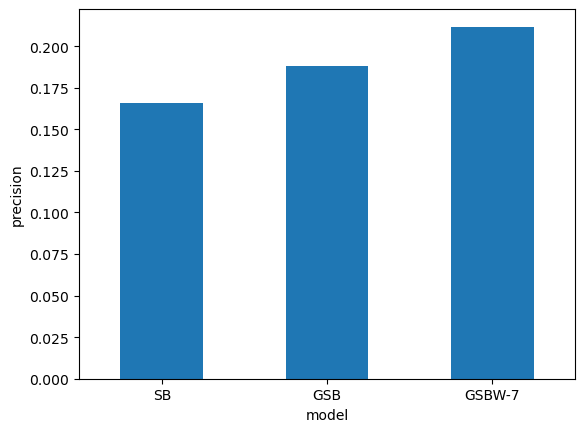

In [4]:
ax = old_models_avg_pre.plot.bar(rot=0)
ax.legend().remove()
ax.set_ylabel("precision")
ax.set_xlabel("model")
plt.show()

## Intoducing Pruned GSB (PGSB) and conceptualized GSB (CGSB)

### Performance based on the size of spectral clustering

In [5]:
data = pd.read_excel('exps.xlsx', sheet_name="complete-graph-clusters")
data

,PGSB-30,CGSB-30,PGSB-50,CGSB-50,PGSB-70,CGSB-70,PGSB-90,CGSB-90,PGSB-110,CGSB-110,PGSB-130,CGSB-130,PGSB-150,CGSB-150,PGSB-170,CGSB-170,avg_pre,%prune
0,0.303,0.294,0.303,0.298,0.344,0.298,0.321,0.298,0.321,0.299,0.321,0.298,0.321,0.298,0.321,0.299,0.20990,29.326771
1,0.190,0.076,0.195,0.061,0.199,0.061,0.190,0.061,0.190,0.069,0.190,0.062,0.190,0.062,0.190,0.069,0.24283,27.473101
2,0.173,0.175,0.173,0.174,0.173,0.175,0.173,0.176,0.148,0.177,0.173,0.176,0.173,0.176,0.173,0.177,0.22871,33.625574
3,0.114,0.128,0.114,0.128,0.114,0.128,0.093,0.128,0.114,0.129,0.114,0.128,0.114,0.128,0.114,0.129,0.24238,22.624413
4,0.300,0.311,0.300,0.309,0.300,0.313,0.300,0.309,0.300,0.314,0.300,0.309,0.300,0.309,0.300,0.314,0.22397,34.078264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.332,0.273,0.332,0.274,0.332,0.273,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,NaN,NaN
96,0.379,0.361,0.379,0.364,0.379,0.367,0.379,0.358,0.379,0.359,0.234,0.358,0.379,0.358,0.379,0.359,NaN,NaN
97,0.145,0.124,0.138,0.124,0.138,0.125,0.156,0.125,0.145,0.127,0.145,0.125,0.156,0.125,0.145,0.127,NaN,NaN
98,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [6]:
clusters_experiment = data.iloc[:, :-2]
clusters_experiment

,PGSB-30,CGSB-30,PGSB-50,CGSB-50,PGSB-70,CGSB-70,PGSB-90,CGSB-90,PGSB-110,CGSB-110,PGSB-130,CGSB-130,PGSB-150,CGSB-150,PGSB-170,CGSB-170
0,0.303,0.294,0.303,0.298,0.344,0.298,0.321,0.298,0.321,0.299,0.321,0.298,0.321,0.298,0.321,0.299
1,0.190,0.076,0.195,0.061,0.199,0.061,0.190,0.061,0.190,0.069,0.190,0.062,0.190,0.062,0.190,0.069
2,0.173,0.175,0.173,0.174,0.173,0.175,0.173,0.176,0.148,0.177,0.173,0.176,0.173,0.176,0.173,0.177
3,0.114,0.128,0.114,0.128,0.114,0.128,0.093,0.128,0.114,0.129,0.114,0.128,0.114,0.128,0.114,0.129
4,0.300,0.311,0.300,0.309,0.300,0.313,0.300,0.309,0.300,0.314,0.300,0.309,0.300,0.309,0.300,0.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.332,0.273,0.332,0.274,0.332,0.273,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275
96,0.379,0.361,0.379,0.364,0.379,0.367,0.379,0.358,0.379,0.359,0.234,0.358,0.379,0.358,0.379,0.359
97,0.145,0.124,0.138,0.124,0.138,0.125,0.156,0.125,0.145,0.127,0.145,0.125,0.156,0.125,0.145,0.127
98,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602


In [7]:
models_avg_pre = data["avg_pre"].dropna().values
models_avg_pre

array([0.2099 , 0.24283, 0.22871, 0.24238, 0.22397, 0.24279, 0.20793,
       0.2417 , 0.22173, 0.24386, 0.21438, 0.24366, 0.21121, 0.24376,
       0.21396, 0.24366])

In [8]:
models_prune_per = data["%prune"].dropna().values
models_prune_per

array([29.32677072, 27.47310124, 33.62557397, 22.62441274, 34.07826427,
       30.82281806, 24.98245386, 28.92985587, 32.6022089 , 29.46745883,
       28.3814062 , 27.74868191, 25.93233785, 26.17314527, 30.42914658,
       28.56484307])

In [9]:
df = pd.DataFrame({"model": clusters_experiment.columns, "avg_pre": models_avg_pre, "%prune": models_prune_per})
df = df.sort_values(by="avg_pre", ascending=False)
df.head()

,model,avg_pre,%prune
9,CGSB-110,0.24386,29.467459
13,CGSB-150,0.24376,26.173145
11,CGSB-130,0.24366,27.748682
15,CGSB-170,0.24366,28.564843
1,CGSB-30,0.24283,27.473101


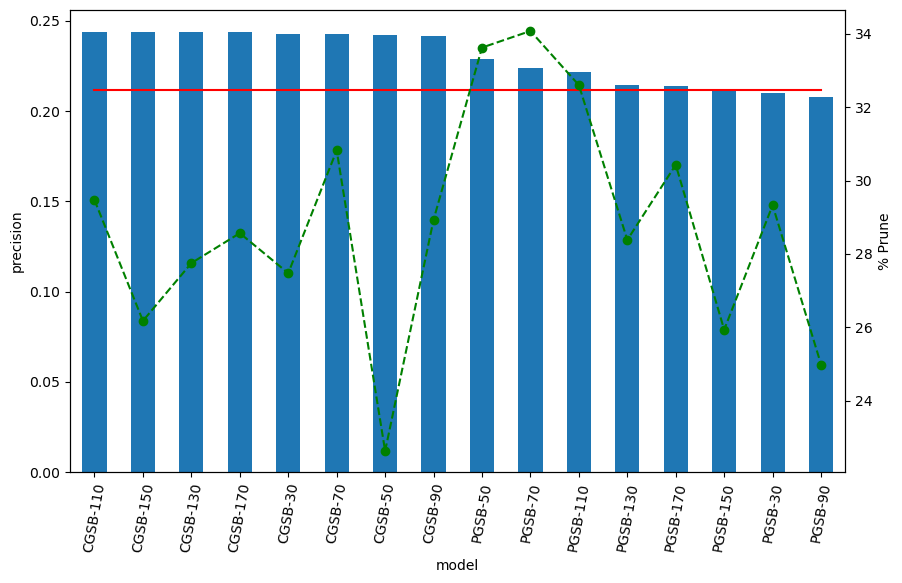

In [10]:
ax = df.plot.bar(x="model", y="avg_pre", rot=80, figsize=(10, 6))
ax.set_ylabel('precision')

ax.plot([old_best_model for _ in range(df.shape[0])], color='red', linestyle='-', label="Best Model")

ax2 = ax.twinx()
# plot prune percentage line
ax2.plot(df["%prune"].values, color='green', linestyle='--', marker='o')
ax2.set_ylabel('% Prune')

# Remove the legend
ax.legend().remove()

# Display the chart
plt.show()

### Performance based on the size of spectral clustering and similarity between nodes

In [11]:
data = pd.read_excel('exps.xlsx', sheet_name="complete-graph-clusters-sim")
data

,PGSB-30-0.1,CGSB-30-0.1,PGSB-30-0.3,CGSB-30-0.3,PGSB-30-0.5,CGSB-30-0.5,PGSB-30-0.7,CGSB-30-0.7,PGSB-50-0.1,CGSB-50-0.1,...,PGSB-170-0.1,CGSB-170-0.1,PGSB-170-0.3,CGSB-170-0.3,PGSB-170-0.5,CGSB-170-0.5,PGSB-170-0.7,CGSB-170-0.7,avg_pre,%prune
0,0.312,0.299,0.323,0.299,0.307,0.301,0.271,0.297,0.337,0.294,...,0.315,0.284,0.334,0.299,0.241,0.299,0.263,0.299,0.23351,64.230448
1,0.106,0.060,0.110,0.059,0.076,0.049,0.060,0.057,0.176,0.060,...,0.177,0.071,0.078,0.059,0.065,0.069,0.078,0.069,0.24342,67.042402
2,0.172,0.174,0.170,0.174,0.187,0.175,0.191,0.174,0.174,0.175,...,0.172,0.181,0.175,0.177,0.186,0.177,0.172,0.177,0.23651,80.562444
3,0.100,0.129,0.105,0.130,0.105,0.128,0.154,0.129,0.105,0.128,...,0.110,0.129,0.104,0.129,0.111,0.130,0.097,0.128,0.24302,80.339502
4,0.295,0.313,0.281,0.313,0.305,0.307,0.294,0.306,0.295,0.313,...,0.298,0.311,0.320,0.314,0.275,0.309,0.098,0.310,0.23684,88.933759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.280,0.274,0.276,0.274,0.274,0.274,0.276,0.273,0.308,0.274,...,0.287,0.273,0.269,0.275,0.277,0.275,0.289,0.275,NaN,NaN
96,0.343,0.365,0.351,0.358,0.380,0.367,0.285,0.367,0.318,0.367,...,0.312,0.359,0.343,0.359,0.240,0.347,0.379,0.359,NaN,NaN
97,0.131,0.125,0.172,0.125,0.124,0.122,0.122,0.126,0.131,0.125,...,0.135,0.125,0.101,0.127,0.122,0.126,0.131,0.124,NaN,NaN
98,0.602,0.603,0.602,0.603,0.602,0.603,0.602,0.602,0.602,0.603,...,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [12]:
cls_sim_experiment = data.iloc[:, :-2]
cls_sim_experiment

,PGSB-30-0.1,CGSB-30-0.1,PGSB-30-0.3,CGSB-30-0.3,PGSB-30-0.5,CGSB-30-0.5,PGSB-30-0.7,CGSB-30-0.7,PGSB-50-0.1,CGSB-50-0.1,...,PGSB-150-0.7,CGSB-150-0.7,PGSB-170-0.1,CGSB-170-0.1,PGSB-170-0.3,CGSB-170-0.3,PGSB-170-0.5,CGSB-170-0.5,PGSB-170-0.7,CGSB-170-0.7
0,0.312,0.299,0.323,0.299,0.307,0.301,0.271,0.297,0.337,0.294,...,0.347,0.299,0.315,0.284,0.334,0.299,0.241,0.299,0.263,0.299
1,0.106,0.060,0.110,0.059,0.076,0.049,0.060,0.057,0.176,0.060,...,0.159,0.069,0.177,0.071,0.078,0.059,0.065,0.069,0.078,0.069
2,0.172,0.174,0.170,0.174,0.187,0.175,0.191,0.174,0.174,0.175,...,0.176,0.177,0.172,0.181,0.175,0.177,0.186,0.177,0.172,0.177
3,0.100,0.129,0.105,0.130,0.105,0.128,0.154,0.129,0.105,0.128,...,0.092,0.130,0.110,0.129,0.104,0.129,0.111,0.130,0.097,0.128
4,0.295,0.313,0.281,0.313,0.305,0.307,0.294,0.306,0.295,0.313,...,0.265,0.309,0.298,0.311,0.320,0.314,0.275,0.309,0.098,0.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.280,0.274,0.276,0.274,0.274,0.274,0.276,0.273,0.308,0.274,...,0.289,0.275,0.287,0.273,0.269,0.275,0.277,0.275,0.289,0.275
96,0.343,0.365,0.351,0.358,0.380,0.367,0.285,0.367,0.318,0.367,...,0.224,0.359,0.312,0.359,0.343,0.359,0.240,0.347,0.379,0.359
97,0.131,0.125,0.172,0.125,0.124,0.122,0.122,0.126,0.131,0.125,...,0.131,0.126,0.135,0.125,0.101,0.127,0.122,0.126,0.131,0.124
98,0.602,0.603,0.602,0.603,0.602,0.603,0.602,0.602,0.602,0.603,...,0.602,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602


In [13]:
# split dataframes for each similarity condition letting only cluster size to vary
selected_columns = [
    [
        column
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for column in cls_sim_experiment.columns[i:i+2].values  # Get the subset of columns
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

sims_df = [cls_sim_experiment[columns] for columns in selected_columns]
sims_df[0].head()

,PGSB-30-0.1,CGSB-30-0.1,PGSB-50-0.1,CGSB-50-0.1,PGSB-70-0.1,CGSB-70-0.1,PGSB-90-0.1,CGSB-90-0.1,PGSB-110-0.1,CGSB-110-0.1,PGSB-130-0.1,CGSB-130-0.1,PGSB-150-0.1,CGSB-150-0.1,PGSB-170-0.1,CGSB-170-0.1
0,0.312,0.299,0.337,0.294,0.335,0.298,0.342,0.298,0.341,0.299,0.322,0.299,0.320,0.299,0.315,0.284
1,0.106,0.060,0.176,0.060,0.180,0.061,0.181,0.060,0.181,0.069,0.180,0.069,0.178,0.069,0.177,0.071
2,0.172,0.174,0.174,0.175,0.164,0.176,0.169,0.177,0.166,0.177,0.180,0.180,0.178,0.178,0.172,0.181
3,0.100,0.129,0.105,0.128,0.105,0.132,0.110,0.127,0.105,0.128,0.111,0.129,0.110,0.129,0.110,0.129
4,0.295,0.313,0.295,0.313,0.298,0.309,0.317,0.310,0.317,0.310,0.301,0.313,0.304,0.313,0.298,0.311


In [14]:
models_avgs = data['avg_pre'].dropna().values

avgs_sim = [
    [
        avg
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for avg in models_avgs[i:i+2]  # Get the subset of avgs
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

In [15]:
models_prunes_per = data['%prune'].dropna().values

prune_per_sim = [
    [
        prune_per
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for prune_per in models_prunes_per[i:i+2]  # Get the subset of avgs
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

In [16]:
len(sims_df[0].columns), len(avgs_sim[0]), len(prune_per_sim[0])

(16, 16, 16)

In [17]:
def plot_experiment(df, avgs, prune_pers, current_best, title=''):
    
    # get rid of similarity label 
    # df.columns = df.columns.str.replace(r'-0\.\d+', '', regex=True)
    
    df = pd.DataFrame({"model": df.columns, "avg_pre": avgs, "%prune": prune_pers})
    df = df.sort_values(by="avg_pre", ascending=False)
    
    ax = df.plot.bar(x="model", y="avg_pre", rot=60, figsize=(10, 6), title=title)
    ax.set_ylabel('precision')

    ax.plot([current_best for _ in range(df.shape[0])], color='red', linestyle='-', label="Old Best Model")

    ax2 = ax.twinx()
    # plot prune percentage line
    ax2.plot(df["%prune"].values, color='green', linestyle='--', marker='o')
    ax2.set_ylabel('% Prune')

    # Remove the legend
    ax.legend().remove()

    # Display the chart
    plt.show()

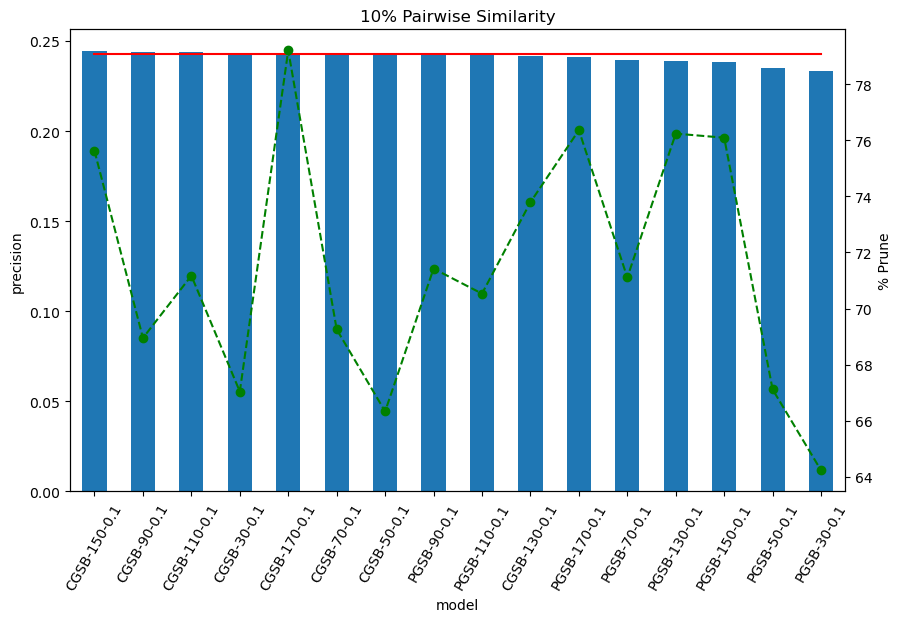

In [18]:
plot_experiment(sims_df[0], avgs_sim[0], prune_per_sim[0], 0.243, title="10% Pairwise Similarity")

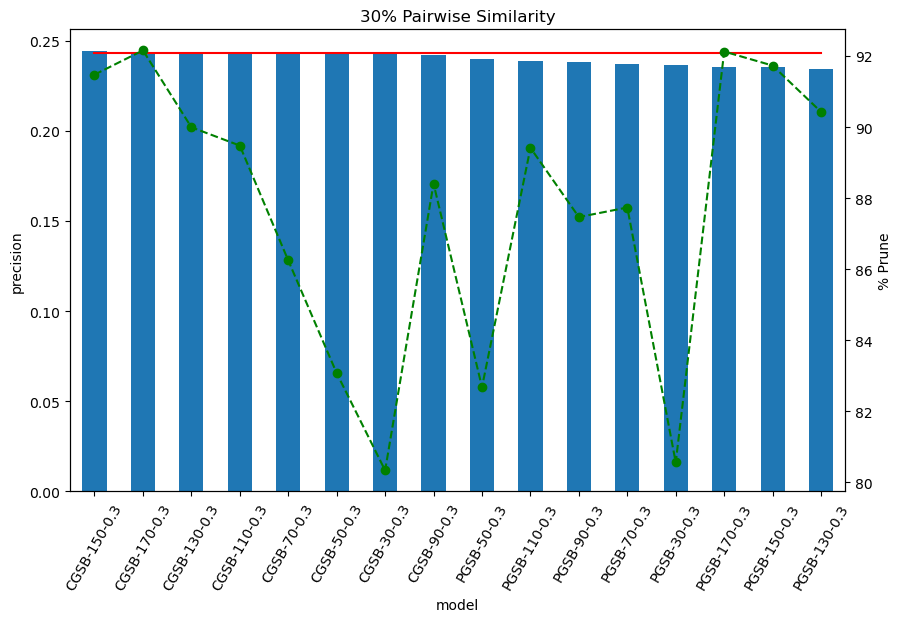

In [19]:
plot_experiment(sims_df[1], avgs_sim[1], prune_per_sim[1], 0.243, title="30% Pairwise Similarity")

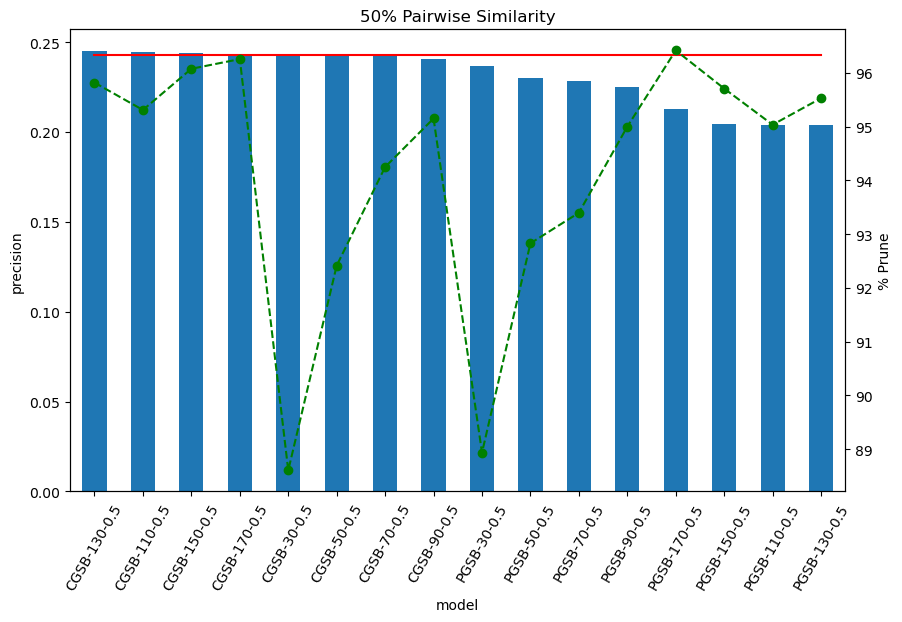

In [20]:
plot_experiment(sims_df[2], avgs_sim[2], prune_per_sim[2], 0.243, title="50% Pairwise Similarity")

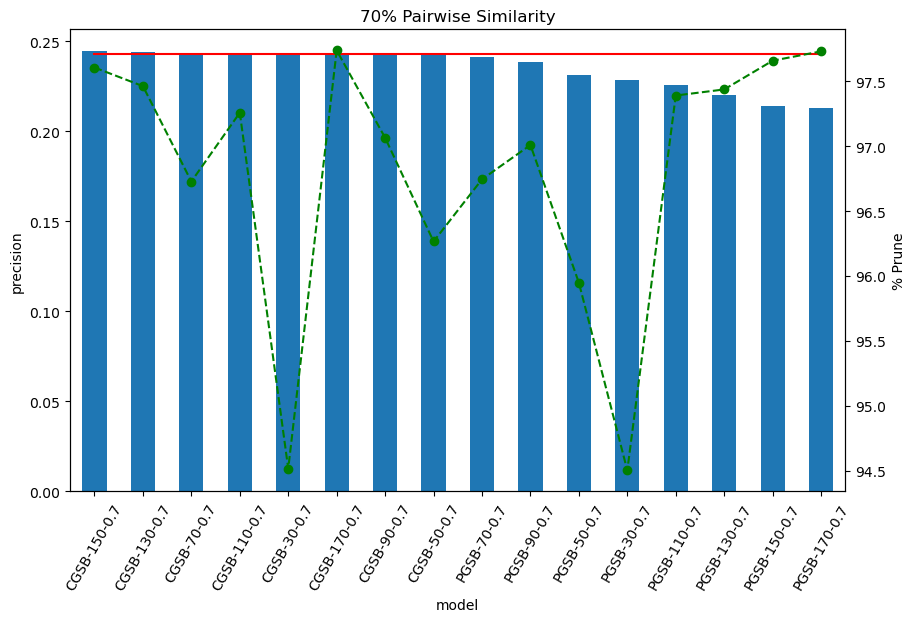

In [21]:
plot_experiment(sims_df[3], avgs_sim[3], prune_per_sim[3], 0.243, title="70% Pairwise Similarity")